#### Import Package

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import feature_selection as fs
from sklearn import tree
from sklearn import ensemble as es
from sklearn import decomposition as dc
from sklearn import preprocessing as pp

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans

# from sklearnex import patch_sklearn
# patch_sklearn()

import warnings

warnings.filterwarnings("ignore");

#### Data Preprocessing

In [28]:
def Fill (df, s): 
    si = SimpleImputer(strategy='constant', fill_value='0')
    a = si.fit_transform(df[[s]])
    l = []
    for i in range(len(a)): l.append(a[i][0])
    return l

def Fill_2 (df, s): 
    si = SimpleImputer(strategy='constant', fill_value=0)
    a = si.fit_transform(df[[s]])
    l = []
    for i in range(len(a)): l.append(a[i][0])
    return l

In [29]:
df = pd.read_csv("archive2/pancreatic_cancer.csv")

le = LabelEncoder();

# df["patient_cohort"] = df["patient_cohort"].map({"Cohort1": 0, "Cohort2": 1})
# df["sex"] = df["sex"].map({"M": 1, "F": 0})
# df["sample_origin"] = df["sample_origin"].map({"LIV": 0, "ESP": 1, "BPTB": 2, "UCL": 3})

df.diagnosis = df.diagnosis == 3

df.patient_cohort = le.fit_transform(df.patient_cohort)
df.sex = le.fit_transform(df.sex)
df.sample_origin = le.fit_transform(df.sample_origin)
df.diagnosis = le.fit_transform(df.diagnosis)

df["stage"] = Fill(df, "stage");
df["benign_sample_diagnosis"] = Fill(df, "benign_sample_diagnosis");
df["REG1A"] = Fill_2(df, "REG1A");
df["plasma_CA19_9"] = Fill_2(df, "plasma_CA19_9");

df = df.drop(["age", "sample_id"], axis=1)

df

,patient_cohort,sample_origin,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,0,0,0,0,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,0,0,0,0,0,0,0.0,0.97266,2.037585,94.467030,209.488250,228.407
2,1,0,1,0,0,0,7.0,0.78039,0.145589,102.366000,461.141000,0.000
3,1,0,1,0,0,0,8.0,0.70122,0.002805,60.579000,142.950000,0.000
4,1,0,1,0,0,0,9.0,0.21489,0.000860,65.540000,41.088000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
585,1,0,1,1,IV,0,0.0,0.52026,7.058209,156.241000,525.178000,0.000
586,1,0,0,1,IV,0,0.0,0.85956,8.341207,16.915000,245.947000,0.000
587,1,0,1,1,IV,0,0.0,1.36851,7.674707,289.701000,537.286000,0.000
588,1,0,0,1,IV,0,0.0,1.33458,8.206777,205.930000,722.523000,0.000


In [30]:
print(df.isna().sum())

print(len(df))

patient_cohort             0
sample_origin              0
sex                        0
diagnosis                  0
stage                      0
benign_sample_diagnosis    0
plasma_CA19_9              0
creatinine                 0
LYVE1                      0
REG1B                      0
TFF1                       0
REG1A                      0
dtype: int64
590


In [31]:
_stage = ["0", "IA", "IB", "I", "IIA", "IIB", "II", "III", "IV"]
oe = OrdinalEncoder(categories=[_stage])
df["stage"] = oe.fit_transform(df[["stage"]])

df["stage"].value_counts()

stage
0.0    391
7.0     76
5.0     68
8.0     21
2.0     12
4.0     11
6.0      7
1.0      3
3.0      1
Name: count, dtype: int64

In [32]:
# for i in range(len(df["benign_sample_diagnosis"])): 
#     if (df["benign_sample_diagnosis"][i] == '0'): df["benign_sample_diagnosis"][i] = 0
    # else: df["benign_sample_diagnosis"][i] = 1

df = df.drop(["benign_sample_diagnosis", "stage"], axis=1)

In [33]:
df

,patient_cohort,sample_origin,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,0,0,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,0,0,0,0,0.0,0.97266,2.037585,94.467030,209.488250,228.407
2,1,0,1,0,7.0,0.78039,0.145589,102.366000,461.141000,0.000
3,1,0,1,0,8.0,0.70122,0.002805,60.579000,142.950000,0.000
4,1,0,1,0,9.0,0.21489,0.000860,65.540000,41.088000,0.000
...,...,...,...,...,...,...,...,...,...,...
585,1,0,1,1,0.0,0.52026,7.058209,156.241000,525.178000,0.000
586,1,0,0,1,0.0,0.85956,8.341207,16.915000,245.947000,0.000
587,1,0,1,1,0.0,1.36851,7.674707,289.701000,537.286000,0.000
588,1,0,0,1,0.0,1.33458,8.206777,205.930000,722.523000,0.000


#### Do PCA To see the relation of groups

In [34]:
target = df["diagnosis"]
data = df.drop(["diagnosis"], axis=1)

In [48]:
dx = pd.DataFrame(data, columns = ["LYVE1", "REG1B"])
print(dx)

        LYVE1       REG1B
0    0.893219   52.948840
1    2.037585   94.467030
2    0.145589  102.366000
3    0.002805   60.579000
4    0.000860   65.540000
..        ...         ...
585  7.058209  156.241000
586  8.341207   16.915000
587  7.674707  289.701000
588  8.206777  205.930000
589  8.200958  411.938275

[590 rows x 2 columns]


In [ ]:
pca = dc.PCA(n_components=2)

pcs = pca.fit_transform(data, target)
pcs_df = pd.DataFrame(data=pcs, columns=["PCA1", "PCA2"])
pcs_df.head()

,PCA1,PCA2
0,-223.377631,804.722989
1,-452.540692,-263.194400
2,-450.592468,-304.916001
3,-489.824958,-487.415915
4,-501.321671,-544.313439


In [ ]:
color = []
for i in target: 
    if (i == 0): color.append("red") # 1, 2期
    elif (i == 1): color.append("blue") # 3期

<Axes: xlabel='PCA1', ylabel='PCA2'>

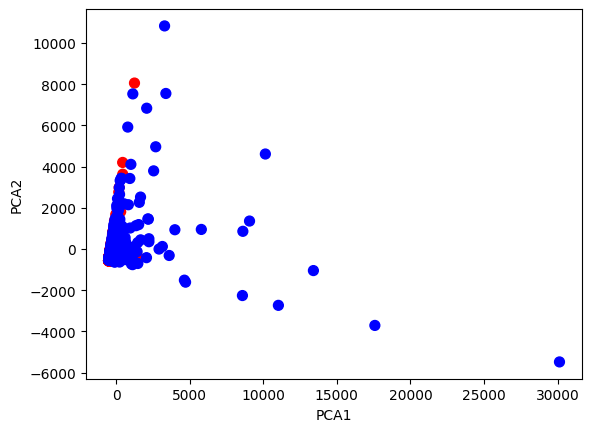

In [ ]:
pcs_df.plot.scatter(x="PCA1", y="PCA2", c=color, s=50)

#### Split Data

In [ ]:
sc = StandardScaler()

data = sc.fit_transform(data)

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

#### Random Forest Model

> Find Maximum Accuracy

In [ ]:
# rng = range(1, 100);
# scores = []

# mx: float = 0
# for i in rng:
#     for k in range(1, 10):
#         rf = RandomForestClassifier(n_estimators=i, max_depth = k, random_state=42)
#         rf.fit(x_train, y_train)
#         if (rf.score(x_test, y_test) >= mx): 
#             mx = rf.score(x_test, y_test)
#             print(f"i: {i}, k: {k}, score: {rf.score(x_test, y_test)}")
#         scores.append(rf.score(x_test, y_test))

i: 1, k: 1, score: 0.847457627118644
i: 1, k: 2, score: 0.8728813559322034
i: 1, k: 4, score: 0.8983050847457628
i: 2, k: 5, score: 0.8983050847457628
i: 3, k: 5, score: 0.9152542372881356
i: 4, k: 5, score: 0.9152542372881356
i: 5, k: 7, score: 0.9152542372881356
i: 6, k: 4, score: 0.9152542372881356
i: 6, k: 7, score: 0.9152542372881356
i: 8, k: 5, score: 0.9152542372881356
i: 9, k: 5, score: 0.923728813559322
i: 11, k: 5, score: 0.923728813559322
i: 12, k: 5, score: 0.923728813559322
i: 13, k: 5, score: 0.923728813559322
i: 15, k: 5, score: 0.9322033898305084
i: 19, k: 5, score: 0.9322033898305084
i: 21, k: 5, score: 0.9322033898305084
i: 22, k: 5, score: 0.9322033898305084
i: 23, k: 5, score: 0.9322033898305084
i: 25, k: 5, score: 0.9322033898305084
i: 26, k: 5, score: 0.940677966101695
i: 45, k: 5, score: 0.940677966101695
i: 48, k: 5, score: 0.940677966101695
i: 49, k: 5, score: 0.940677966101695
i: 50, k: 5, score: 0.940677966101695


> Max: 34, 5 (!3 or 3) -> 0.9406 OR 15, 8 (1 ~ 3) -> 0.8559

In [ ]:
rf = RandomForestClassifier(n_estimators=26, max_depth=5, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95        75
           1       0.97      0.86      0.91        43

    accuracy                           0.94       118
   macro avg       0.95      0.92      0.93       118
weighted avg       0.94      0.94      0.94       118



In [49]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(dx)
pred = kmeans.predict(dx)

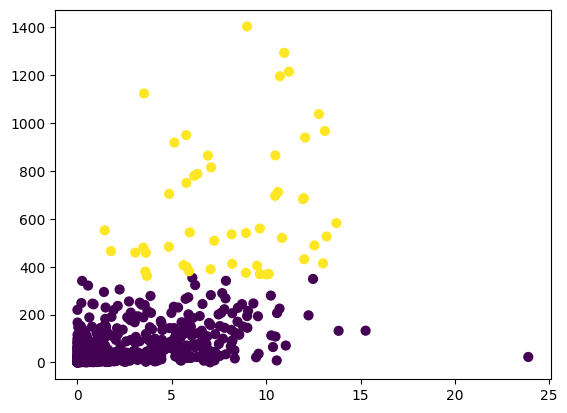

In [50]:
plt.scatter(dx["LYVE1"], dx["REG1B"], c=pred, s=40, cmap='viridis')
plt.show()

In [51]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 

In [47]:
print(target.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 